In [16]:
import os
import pandas as pd
import numpy as np
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns 
import matplotlib.pyplot as plt 
from colorama import Fore

from IPython.display import display

In [4]:
# Update the data loading function to use ffill() instead of fillna(method='ffill')
def load_and_preprocess_data(file_path, rename_columns, fill_na=True):
    """
    Load a CSV file, rename columns, and handle missing values.
    
    :param file_path: Path to the CSV file
    :param rename_columns: Dictionary mapping old column names to new column names
    :param fill_na: If True, fill missing values with forward fill
    :return: Preprocessed DataFrame
    """
    try:
        # Load the dataset
        df = pd.read_csv(file_path)
        # Rename columns for consistency
        df = df.rename(columns=rename_columns)
        # Handle missing values (if any)
        if fill_na:
            df = df.ffill()  # Use ffill() to forward fill missing values
        return df
    except Exception as e:
        print(Fore.RED + f"Error loading or processing {file_path}: {e}" + Fore.RESET)
        return None

In [5]:
# Column renaming dictionary to standardize the columns across all datasets
rename_columns = {
    'Date': 'date',
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'
}

In [9]:
# Define file paths
file_paths = {
    'bitcoin': R'all-cryptocurrencies-price-20152021/Bitcoin/BTC-USD.csv',
    'dogecoin': R'all-cryptocurrencies-price-20152021/Dogecoin/DOGE-USD.csv',
    'ethereum': R'all-cryptocurrencies-price-20152021/Ethereum/ETH-USD.csv',
    'cardano': R'all-cryptocurrencies-price-20152021/Cardano/ADA-USD.csv'
}


In [10]:
# Load and preprocess data for each cryptocurrency
bitcoindf = load_and_preprocess_data(file_paths['bitcoin'], rename_columns)
dogecoindf = load_and_preprocess_data(file_paths['dogecoin'], rename_columns)
ethereumdf = load_and_preprocess_data(file_paths['ethereum'], rename_columns)
cardanodf = load_and_preprocess_data(file_paths['cardano'], rename_columns)

In [11]:
# Display the first few rows of the Bitcoin dataset to confirm
if bitcoindf is not None:
    print(bitcoindf.head())

         date        open        high         low       close   adj_close  \
0  2015-09-13  235.242004  235.934998  229.332001  230.511993  230.511993   
1  2015-09-14  230.608994  232.440002  227.960999  230.643997  230.643997   
2  2015-09-15  230.492004  259.182007  229.822006  230.304001  230.304001   
3  2015-09-16  230.250000  231.214996  227.401993  229.091003  229.091003   
4  2015-09-17  229.076004  230.285004  228.925995  229.809998  229.809998   

       volume  
0  18478800.0  
1  20997800.0  
2  19177800.0  
3  20144200.0  
4  18935400.0  


In [12]:
# Optional: Explore and visualize the data to check trends or anomalies
def plot_data(df, title='Cryptocurrency Data', column='close'):
    """
    Plot the closing price of a cryptocurrency.
    
    :param df: DataFrame containing the cryptocurrency data
    :param title: Title for the plot
    :param column: Column to plot (default is 'close')
    """
    if df is not None:
        df['date'] = pd.to_datetime(df['date'])
        plt.figure(figsize=(12, 6))
        plt.plot(df['date'], df[column], label=title, color='blue')
        plt.title(f'{title} Price Trend')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.show()

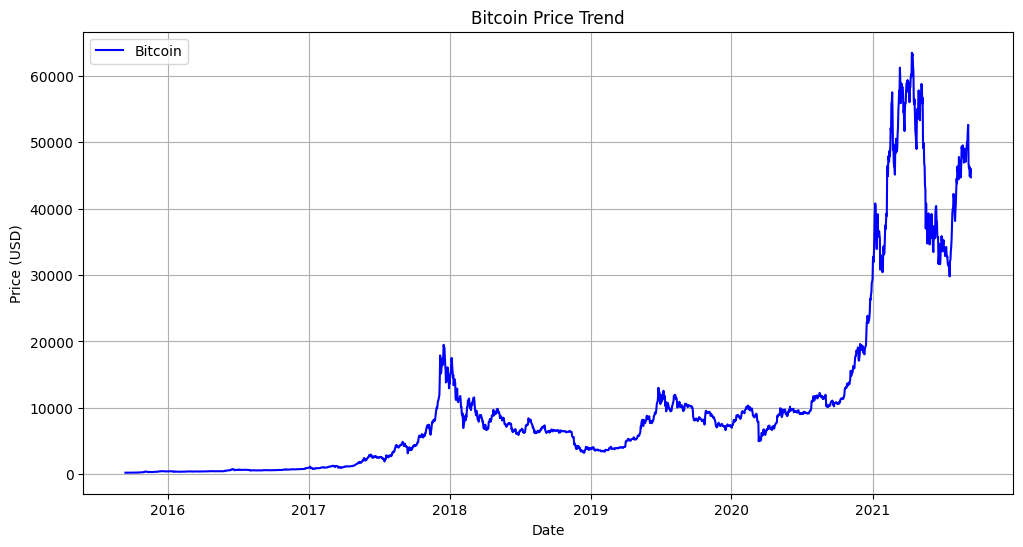

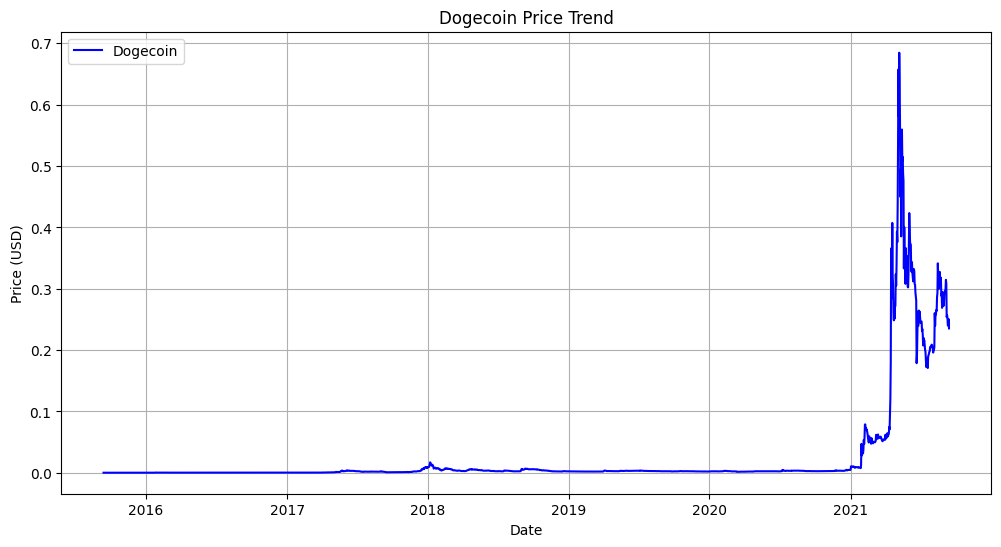

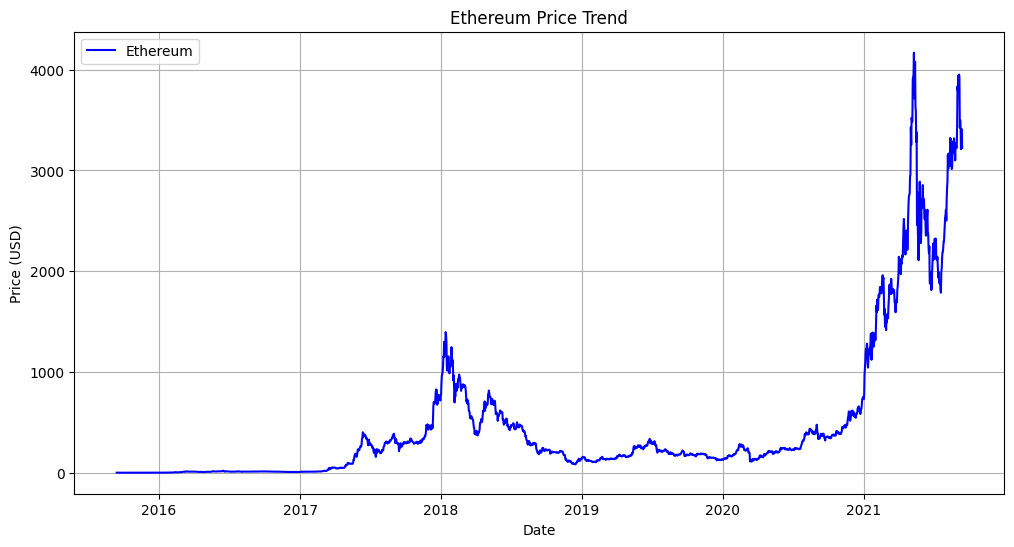

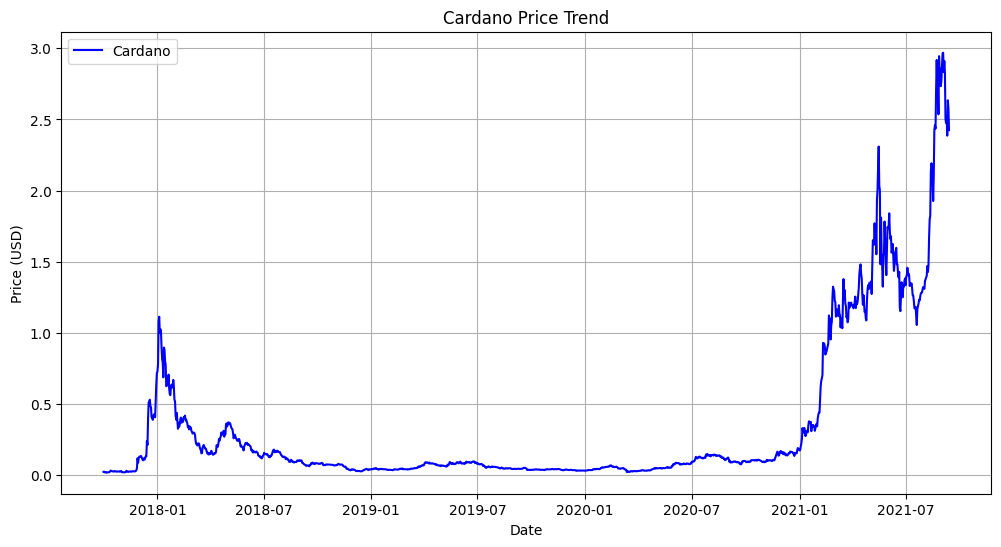

In [13]:
# Plot the data for each cryptocurrency (optional)
plot_data(bitcoindf, 'Bitcoin', 'close')
plot_data(dogecoindf, 'Dogecoin', 'close')
plot_data(ethereumdf, 'Ethereum', 'close')
plot_data(cardanodf, 'Cardano', 'close')

In [17]:
# Function to process and display data with styling
def process_and_style_data(df, coin_name, color):
    # Convert the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Display the first few rows with styled background for 'date' and 'close' columns
    return df.head().style.set_properties(subset=['date', 'close'], **{'background-color': color}).set_caption(f"{coin_name} Data")

In [18]:
# Process each DataFrame and apply styling
bitcoin_styled = process_and_style_data(bitcoindf, 'Bitcoin', 'skyblue')
dogecoin_styled = process_and_style_data(dogecoindf, 'Dogecoin', 'pink')
ethereum_styled = process_and_style_data(ethereumdf, 'Ethereum', 'lightgrey')
cardano_styled = process_and_style_data(cardanodf, 'Cardano', 'yellow')

In [19]:
# Display the styled data
display(bitcoin_styled)
display(dogecoin_styled)
display(ethereum_styled)
display(cardano_styled)

,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,235.242004,235.934998,229.332001,230.511993,230.511993,18478800.000000
1,2015-09-14 00:00:00,230.608994,232.440002,227.960999,230.643997,230.643997,20997800.000000
2,2015-09-15 00:00:00,230.492004,259.182007,229.822006,230.304001,230.304001,19177800.000000
3,2015-09-16 00:00:00,230.250000,231.214996,227.401993,229.091003,229.091003,20144200.000000
4,2015-09-17 00:00:00,229.076004,230.285004,228.925995,229.809998,229.809998,18935400.000000


,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,0.000127,0.000129,0.000123,0.000126,0.000126,40889.000000
1,2015-09-14 00:00:00,0.000125,0.000126,0.000122,0.000125,0.000125,61189.000000
2,2015-09-15 00:00:00,0.000125,0.000131,0.000123,0.000126,0.000126,43332.000000
3,2015-09-16 00:00:00,0.000126,0.000126,0.000122,0.000124,0.000124,60323.000000
4,2015-09-17 00:00:00,0.000124,0.000126,0.000122,0.000125,0.000125,60512.000000


,date,open,high,low,close,adj_close,volume
0,2015-09-13 00:00:00,1.041780,1.042700,0.902832,0.936003,0.936003,644138.000000
1,2015-09-14 00:00:00,0.940566,0.949387,0.871760,0.875622,0.875622,741085.000000
2,2015-09-15 00:00:00,0.875189,1.045540,0.875189,0.944410,0.944410,703390.000000
3,2015-09-16 00:00:00,0.941977,0.952698,0.901639,0.907175,0.907175,615593.000000
4,2015-09-17 00:00:00,0.906865,0.909204,0.831132,0.874231,0.874231,897940.000000


,date,open,high,low,close,adj_close,volume
0,2017-10-01 00:00:00,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.000000
1,2017-10-02 00:00:00,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.000000
2,2017-10-03 00:00:00,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.000000
3,2017-10-04 00:00:00,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.000000
4,2017-10-05 00:00:00,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.000000


In [20]:
# Function to plot close prices for different cryptocurrencies
def plot_close_prices(cryptos, colors, titles, figsize=(15, 10)):
    fig, axs = plt.subplots(2, 2, figsize=figsize)

    for i, crypto in enumerate(cryptos):
        ax = axs[i // 2, i % 2]
        ax.plot(crypto['date'], crypto['close'], color=colors[i])
        ax.set_title(titles[i])

    plt.tight_layout()
    plt.show()

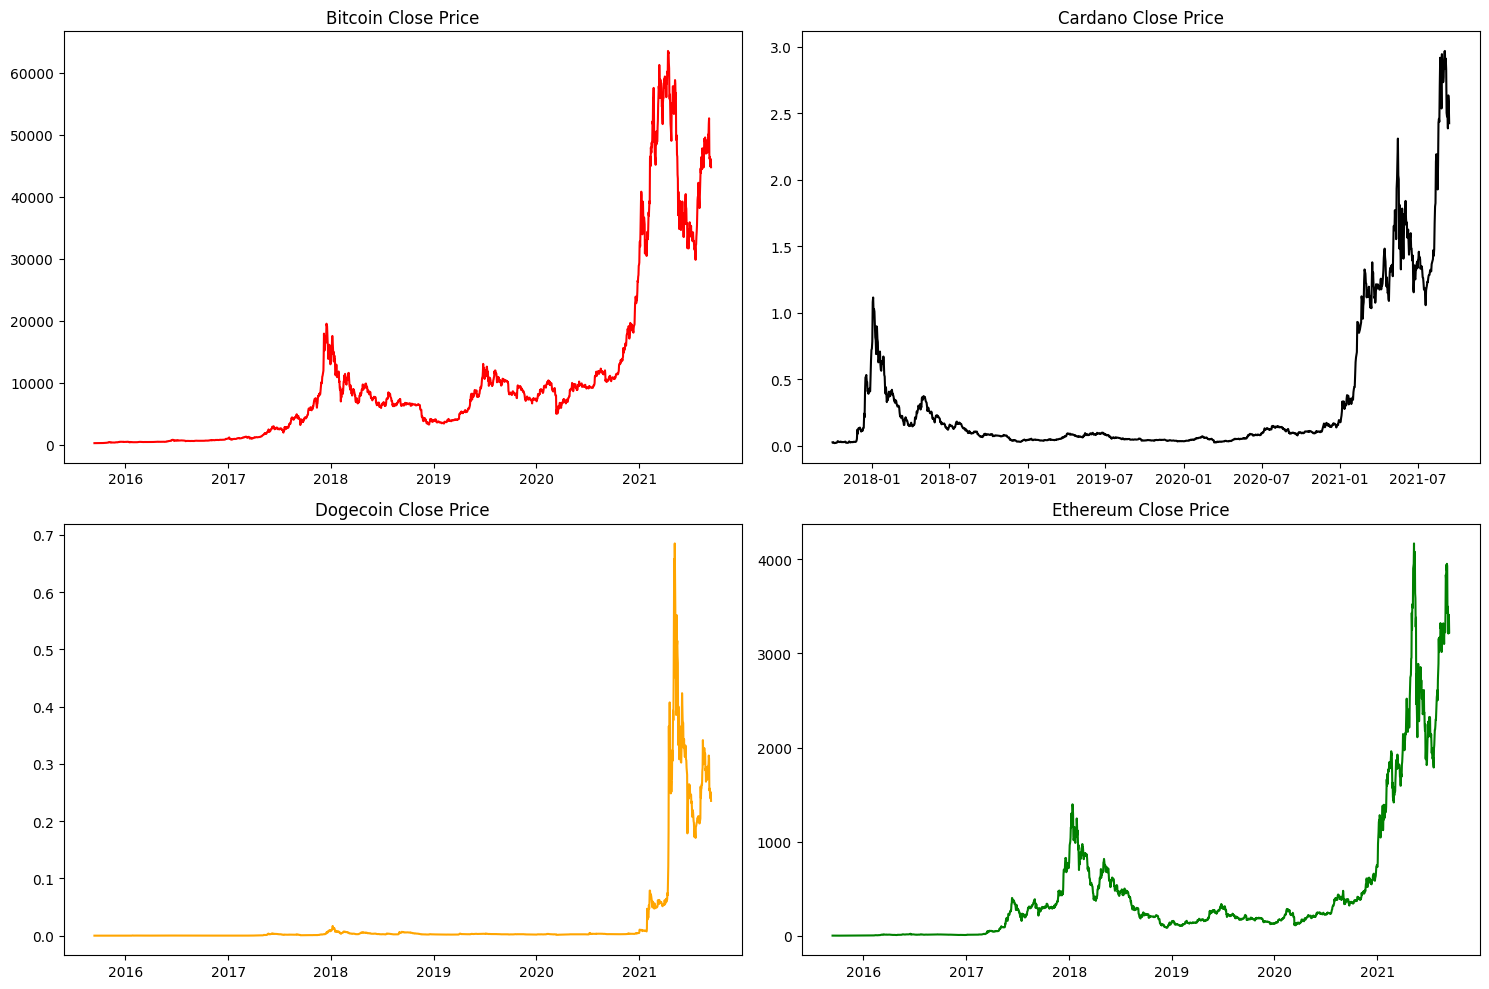

In [21]:
# Data for plotting close prices
cryptos = [bitcoindf, cardanodf, dogecoindf, ethereumdf]
colors = ['red', 'black', 'orange', 'green']
titles = ['Bitcoin Close Price', 'Cardano Close Price', 'Dogecoin Close Price', 'Ethereum Close Price']
plot_close_prices(cryptos, colors, titles)

In [22]:
# Function to plot the last 1 year close prices
def plot_last_year_close_prices(cryptos, colors, titles, start_date='09-2020', figsize=(15, 10)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(f"Last 1 Year Close Prices of {', '.join(titles)}", fontsize=16)

    for i, crypto in enumerate(cryptos):
        last_year = crypto[crypto['date'] > start_date]
        plt.subplot(4, 1, i+1)
        plt.plot(last_year['date'], last_year['close'], color=colors[i])
        plt.legend([titles[i]])

    plt.tight_layout()
    plt.show()

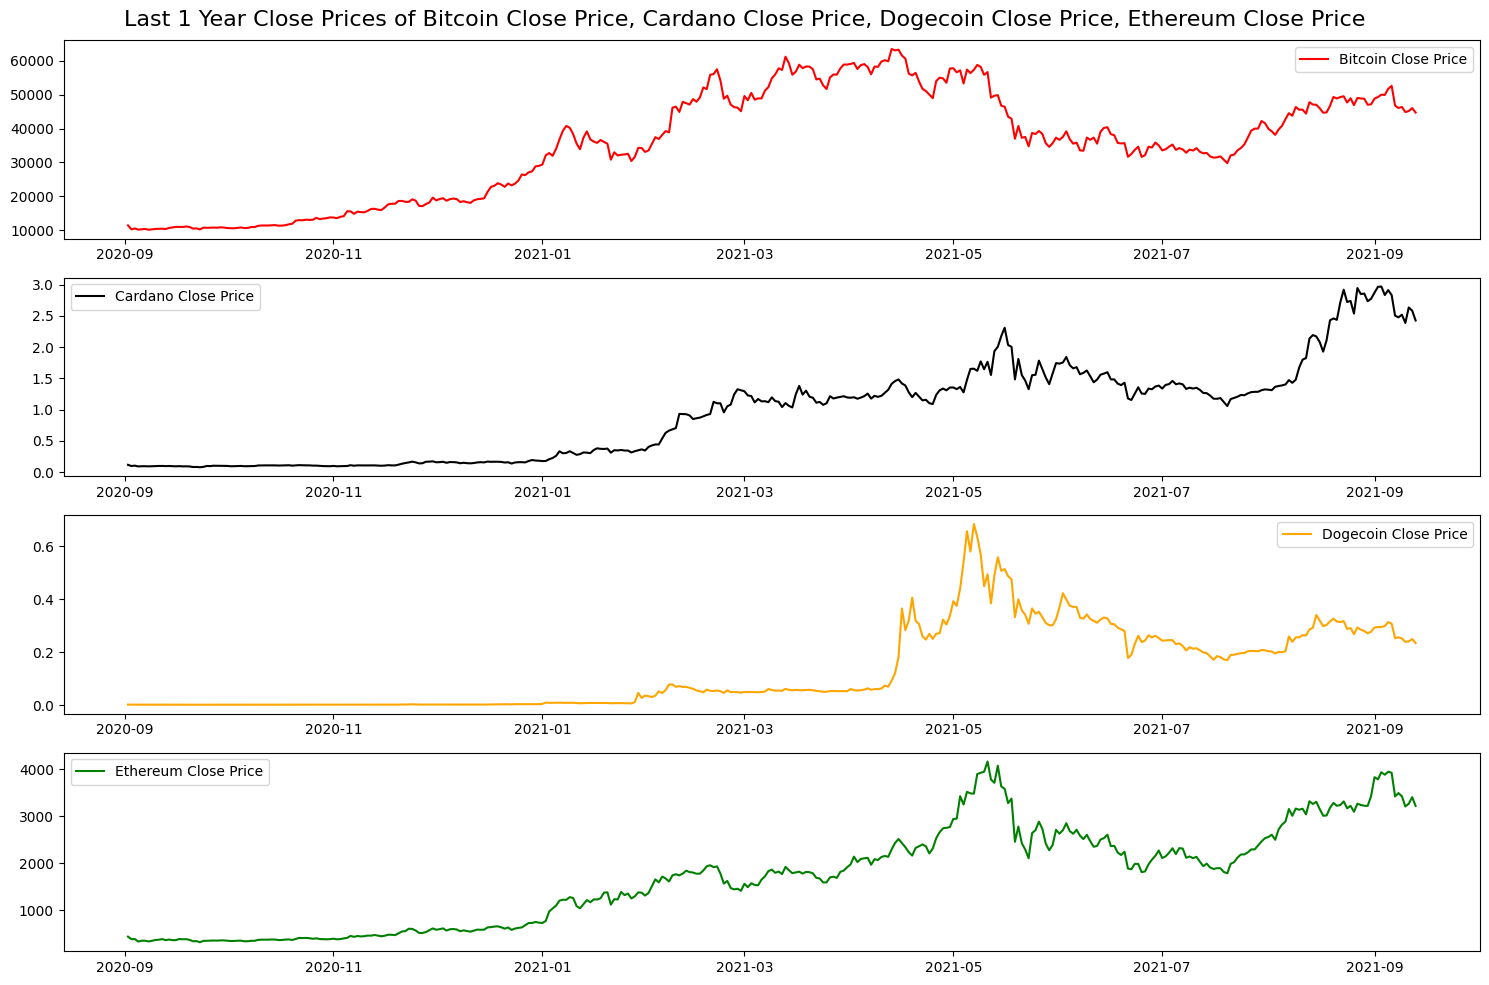

In [23]:
# Plot the last 1 year close prices
plot_last_year_close_prices(cryptos, colors, titles)

In [24]:
# Function to plot volume for different cryptocurrencies
def plot_volume(cryptos, colors, titles, figsize=(15, 7)):
    fig = plt.figure(figsize=figsize)

    for i, crypto in enumerate(cryptos):
        last_year = crypto[crypto['date'] > '09-2020']
        plt.plot(last_year['date'], last_year['volume'], color=colors[i])

    plt.title('Volume of Bitcoin, Cardano, Dogecoin, Ethereum')
    plt.legend(titles)
    plt.show()


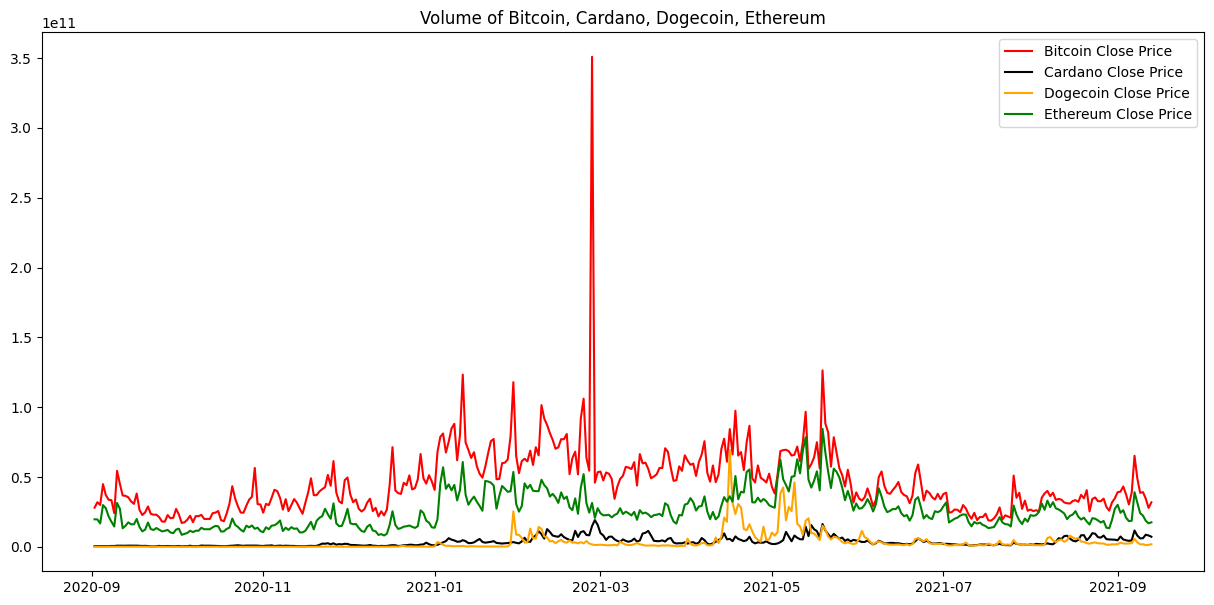

In [25]:
# Plot volume for each cryptocurrency
plot_volume(cryptos, colors, titles)

In [26]:
# Function to plot the last month comparison of close and open prices
def plot_last_month_comparison(cryptos, colors, titles, start_date='08-2021', figsize=(15, 15)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle("Last Month Comparison of Close and Open Prices", fontsize=16)
    fig.tight_layout()

    for i, crypto in enumerate(cryptos):
        last_month = crypto[crypto['date'] > start_date]
        plt.subplot(4, 1, i+1)
        plt.plot(last_month['date'], last_month['close'], color=colors[i])
        plt.plot(last_month['date'], last_month['open'], color='grey' if colors[i] != 'grey' else 'black')
        plt.legend(["Close", "Open"])
        plt.title(titles[i])

    plt.tight_layout()
    plt.show()

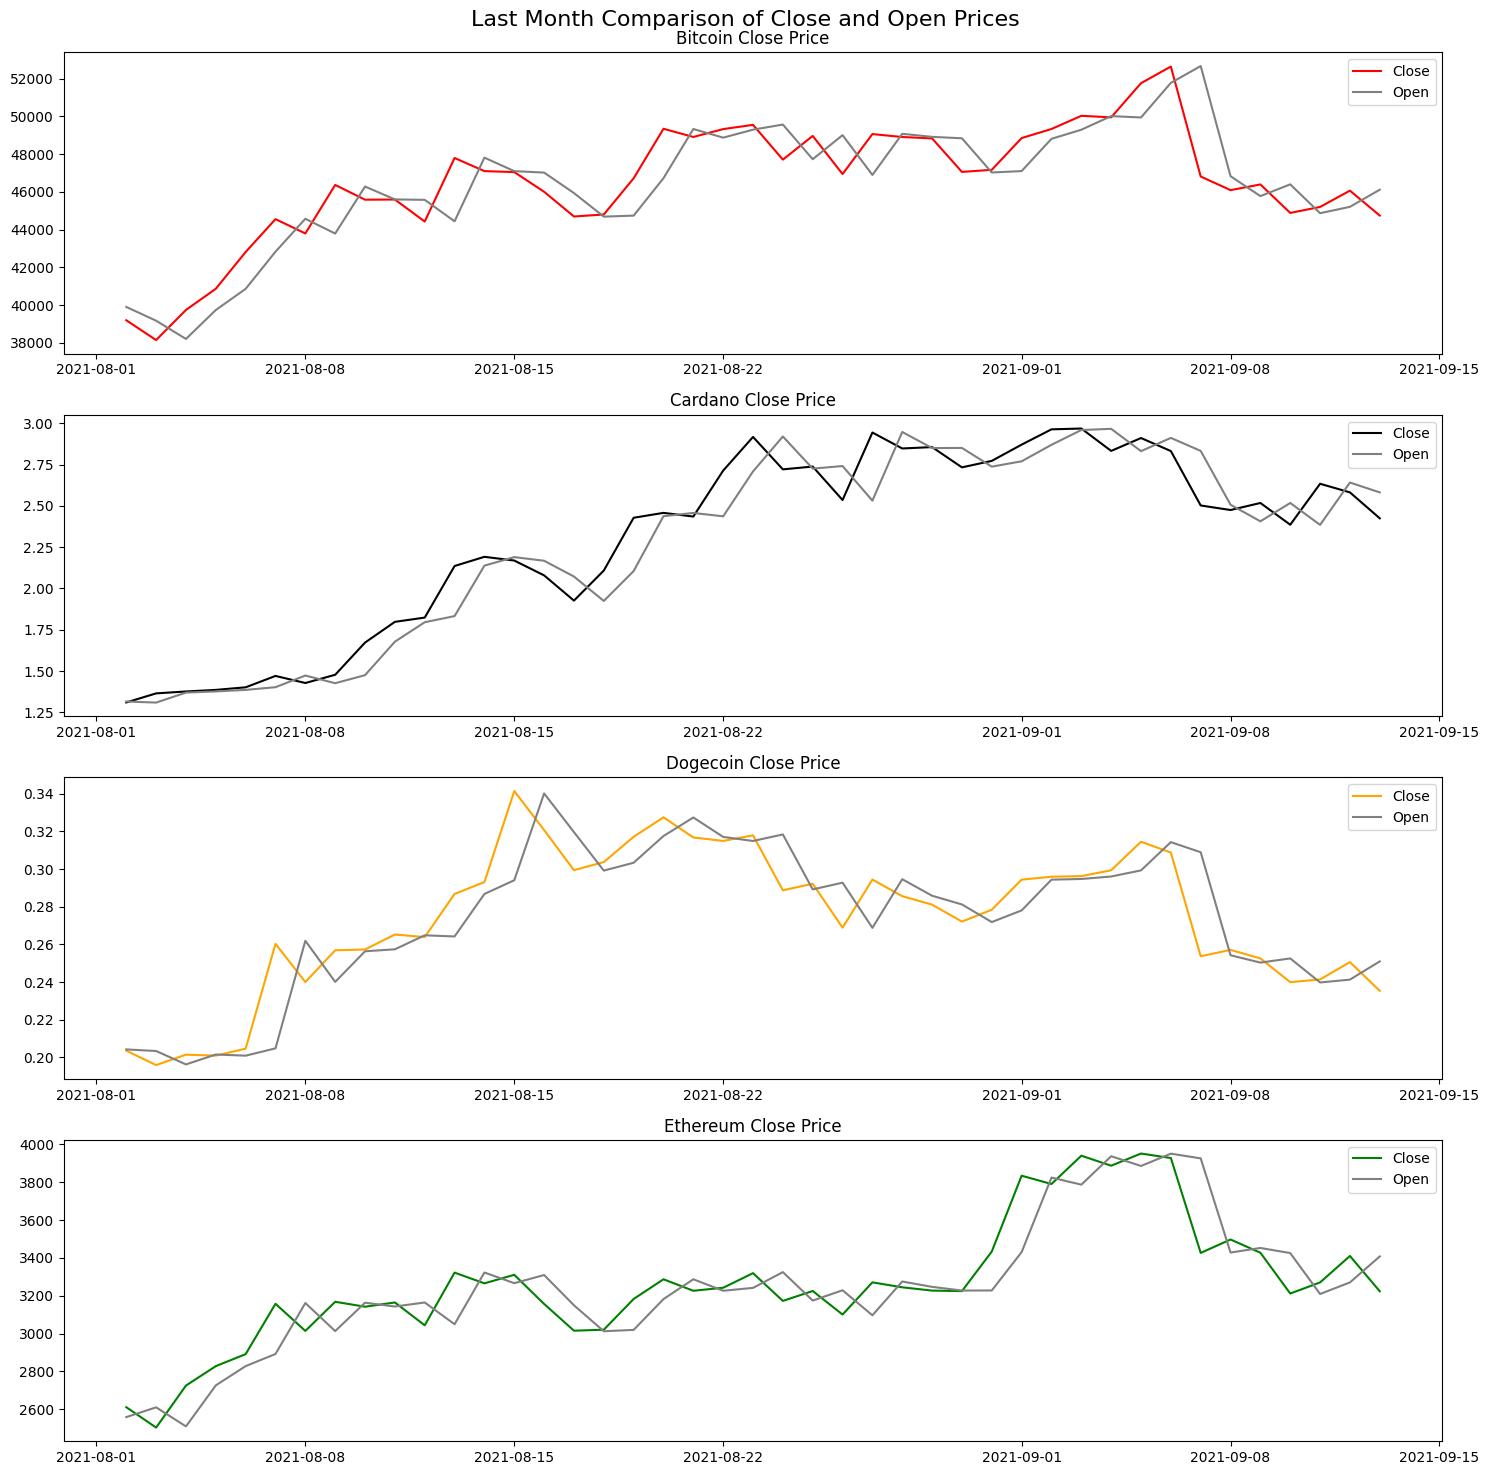

In [27]:
# Plot last month comparison of close and open prices
plot_last_month_comparison(cryptos, colors, titles)

In [28]:
# Function to plot moving averages for close prices
def plot_moving_averages(cryptos, colors, titles, figsize=(15, 10)):
    fig = plt.figure(figsize=figsize)

    for i, crypto in enumerate(cryptos):
        plt.subplot(2, 2, i+1)
        plt.plot(crypto['date'], crypto['close'].rolling(50).mean(), color=colors[i])
        plt.plot(crypto['date'], crypto['close'].rolling(200).mean(), color='blue' if colors[i] != 'blue' else 'red')
        plt.title(f'{titles[i]} Moving Average')

    plt.tight_layout()
    plt.show()

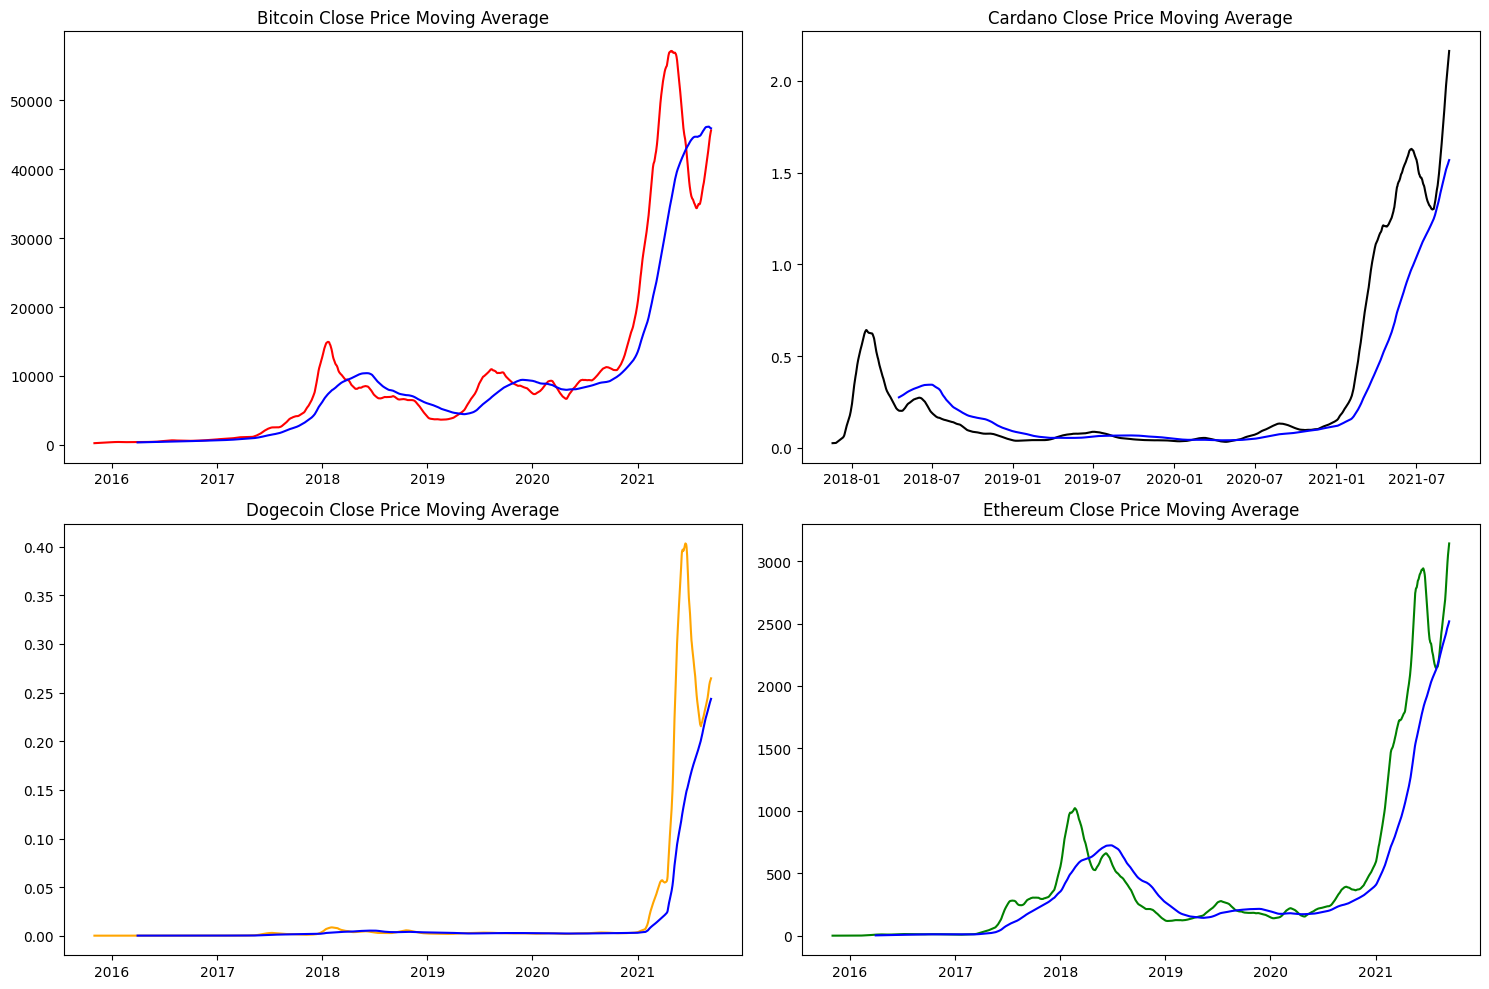

In [29]:
# Plot moving averages for close prices
plot_moving_averages(cryptos, colors, titles)

In [30]:
# Function to plot histograms for close prices
def plot_histograms(cryptos, colors, titles, figsize=(15, 12)):
    fig = plt.figure(figsize=figsize)
    fig.tight_layout()

    for i, crypto in enumerate(cryptos):
        plt.subplot(4, 1, i+1)
        sns.histplot(crypto['close'], color=colors[i], kde=True)
        plt.axvline(crypto['close'].mean(), color='k', linestyle='dashed', linewidth=2)
        plt.text(crypto['close'].mean(), 200, f'{titles[i]} Close Price', fontsize=16)

    plt.show()

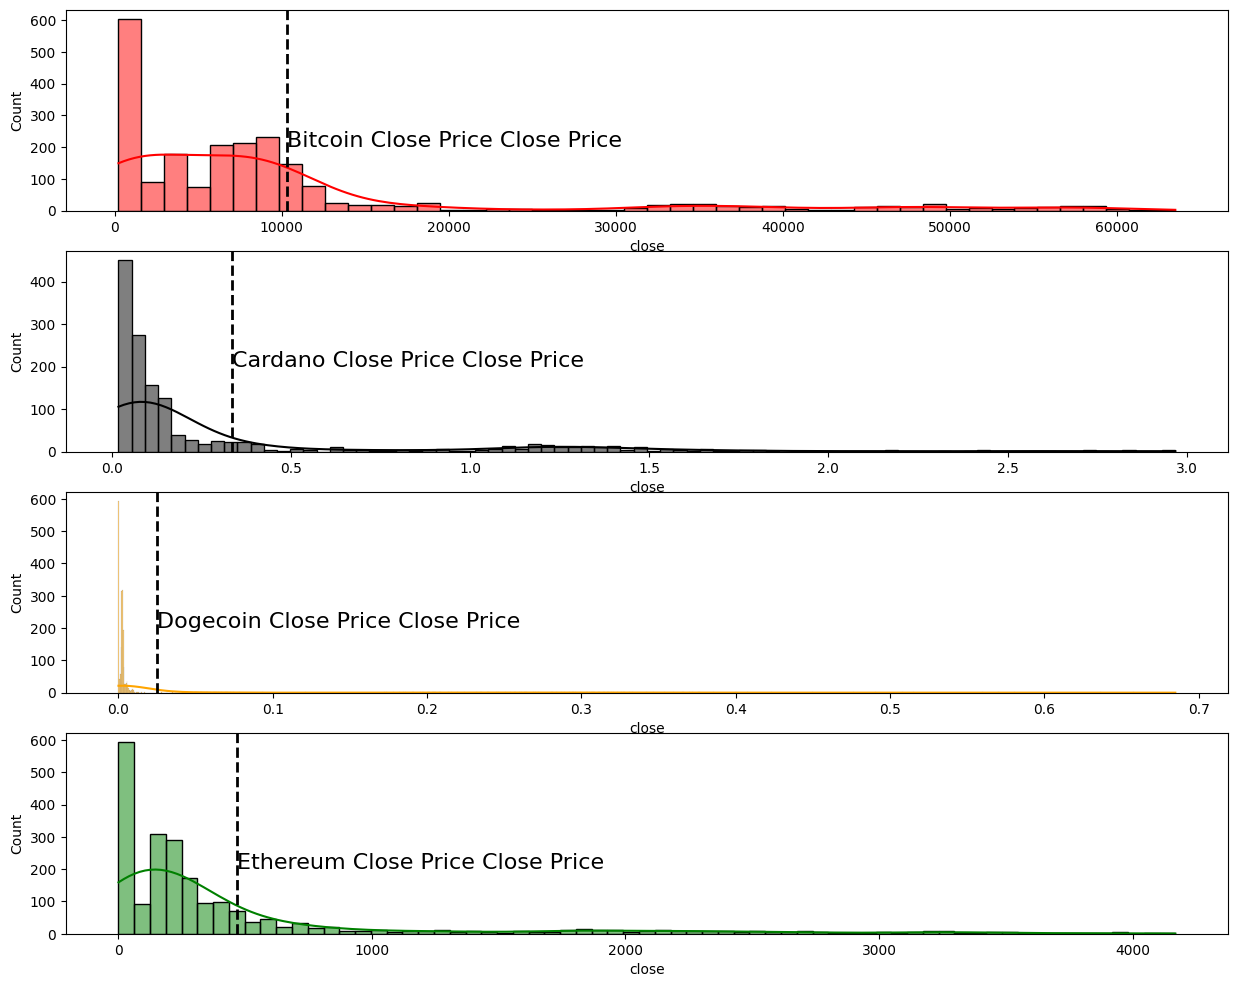

In [31]:
# Plot histograms for close prices
plot_histograms(cryptos, colors, titles)

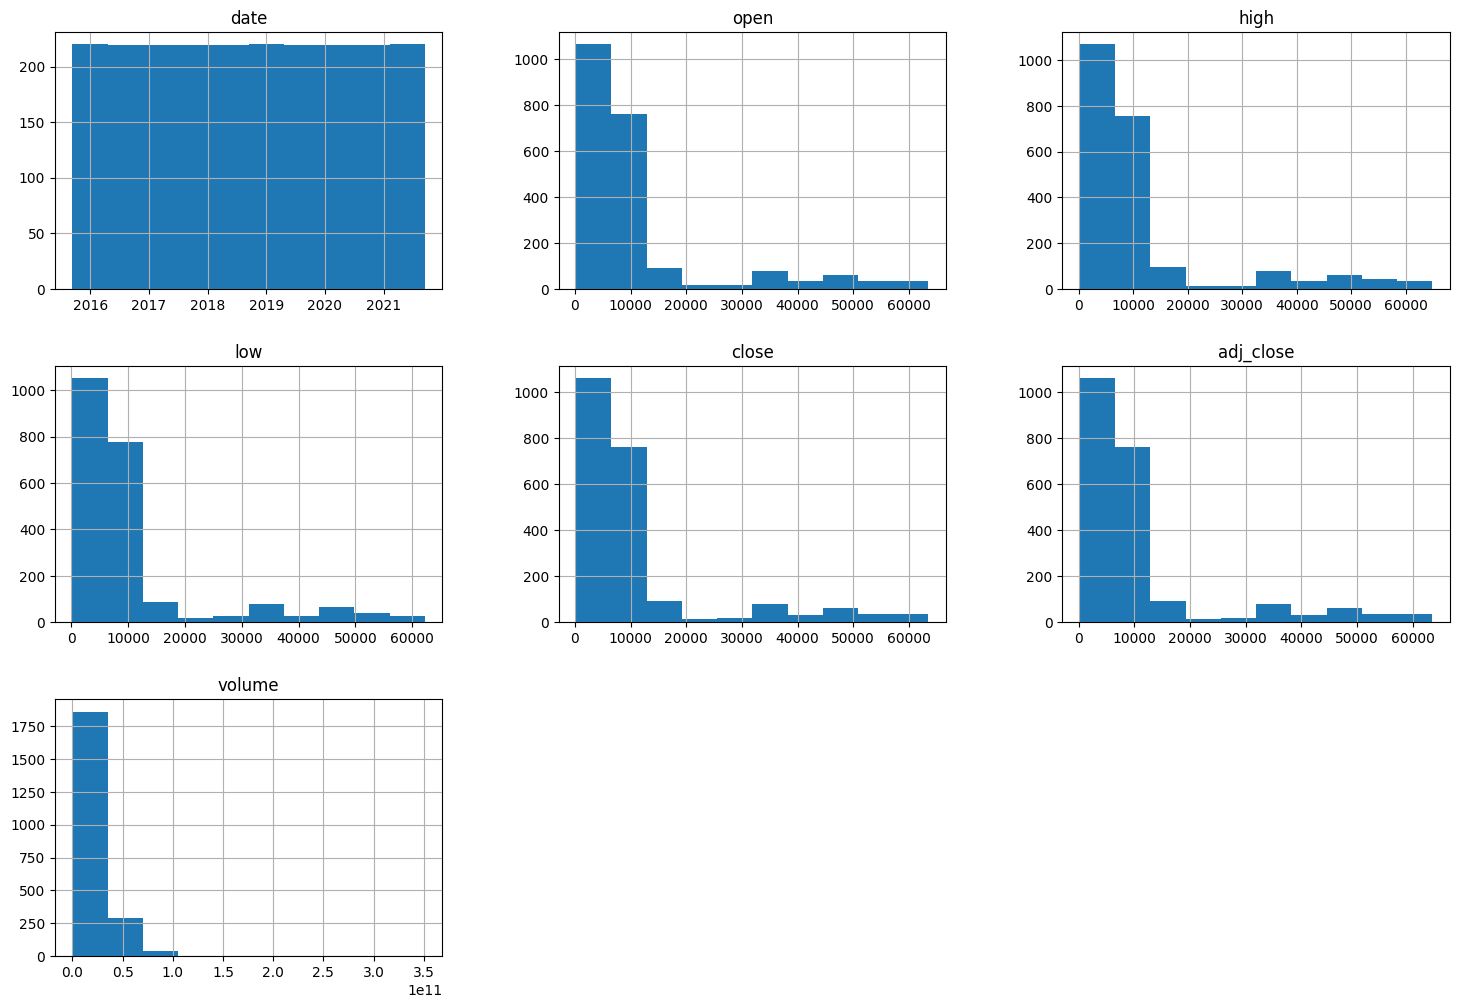

In [32]:
# Plotting numeric data histograms for Bitcoin
bitcoin_numeric = bitcoindf.select_dtypes(exclude=["bool"])
bitcoin_numeric.hist(figsize=(18, 12))
plt.show()